In [35]:
#Life Insurance
#Thayer Adsit

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#Import Libraries and data

from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import datetime
import re
%matplotlib inline

#Read in Test Files
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

#Count keywords. may be a simpler indication of health
Keywords=train.ix[:, 79:126]
keywordSum=Keywords.sum(axis=1)
train["KeywordTotal"]=keywordSum

Keywords=test.ix[:, 79:126]
keywordSum=Keywords.sum(axis=1)
test["KeywordTotal"]=keywordSum

#Convert plan information to number
#pd.value_counts(train["Product_Info_2"])
train["CodeNumber1"]=train["Product_Info_2"].str[:1]
train["CodeNumber2"]=train["Product_Info_2"].str[-1:]

train.loc[train["CodeNumber1"]=="A","CodeNumber1"]=1
train.loc[train["CodeNumber1"]=="B","CodeNumber1"]=2
train.loc[train["CodeNumber1"]=="C","CodeNumber1"]=3
train.loc[train["CodeNumber1"]=="D","CodeNumber1"]=4
train.loc[train["CodeNumber1"]=="E","CodeNumber1"]=5

train.loc[train["CodeNumber2"]=="1","CodeNumber2"]=1
train.loc[train["CodeNumber2"]=="2","CodeNumber2"]=2
train.loc[train["CodeNumber2"]=="3","CodeNumber2"]=3
train.loc[train["CodeNumber2"]=="4","CodeNumber2"]=4
train.loc[train["CodeNumber2"]=="5","CodeNumber2"]=5
train.loc[train["CodeNumber2"]=="6","CodeNumber2"]=6
train.loc[train["CodeNumber2"]=="7","CodeNumber2"]=7
train.loc[train["CodeNumber2"]=="8","CodeNumber2"]=8
train.drop("Product_Info_2",axis=1,inplace=True)
train["CodeNumber1"]=train["CodeNumber1"].astype('int64')
train["CodeNumber2"]=train["CodeNumber2"].astype('int64')


#Apply Same Manipulation to Test
test["CodeNumber1"]=test["Product_Info_2"].str[:1]
test["CodeNumber2"]=test["Product_Info_2"].str[-1:]

test.loc[test["CodeNumber1"]=="A","CodeNumber1"]=1
test.loc[test["CodeNumber1"]=="B","CodeNumber1"]=2
test.loc[test["CodeNumber1"]=="C","CodeNumber1"]=3
test.loc[test["CodeNumber1"]=="D","CodeNumber1"]=4
test.loc[test["CodeNumber1"]=="E","CodeNumber1"]=5

test.loc[test["CodeNumber2"]=="1","CodeNumber2"]=1
test.loc[test["CodeNumber2"]=="2","CodeNumber2"]=2
test.loc[test["CodeNumber2"]=="3","CodeNumber2"]=3
test.loc[test["CodeNumber2"]=="4","CodeNumber2"]=4
test.loc[test["CodeNumber2"]=="5","CodeNumber2"]=5
test.loc[test["CodeNumber2"]=="6","CodeNumber2"]=6
test.loc[test["CodeNumber2"]=="7","CodeNumber2"]=7
test.loc[test["CodeNumber2"]=="8","CodeNumber2"]=8
test.drop("Product_Info_2",axis=1,inplace=True)
test["CodeNumber1"]=test["CodeNumber1"].astype('int64')
test["CodeNumber2"]=test["CodeNumber2"].astype('int64')


C:\Users\Thayer Adsit\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


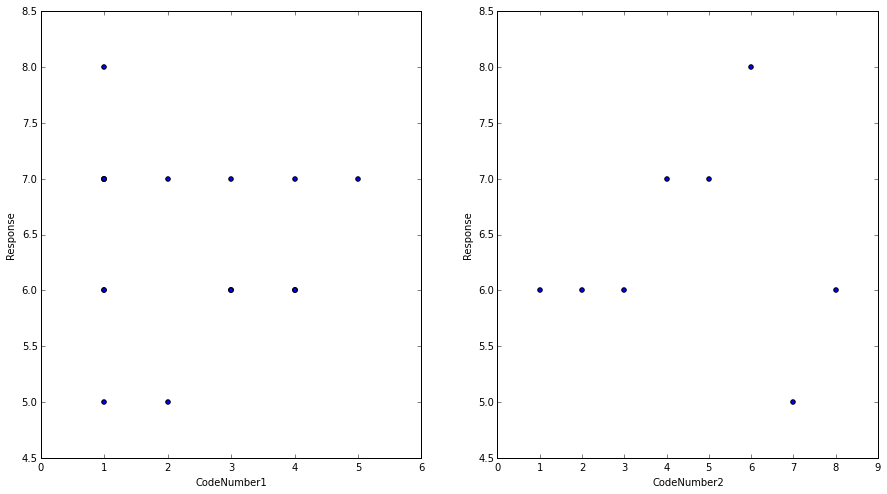

In [2]:
#In my past experience, plan codes are often broken down into a system. The first letter typically corresponds to
#individual, spouse, family. The second code could correspond to coverage level (maybe)
#let's look at it for each season
grouped = train.groupby(by=["CodeNumber1","CodeNumber2"])
a = grouped.median()['Response'].reset_index()
grouped2 = train.groupby(by=["CodeNumber2"])
b = grouped2.median()['Response'].reset_index()

plt.figure()
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,8))
a.plot(x='CodeNumber1',y='Response',kind='scatter',ax=axes[0])
b.plot(x='CodeNumber2',y='Response',kind='scatter',ax=axes[1])


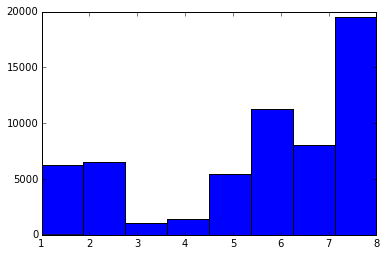

In [10]:
#Histogram Time (total number of responses)
resp = np.array(train['Response'])
plt.hist(resp, bins=np.linspace(1,8,9))
plt.savefig('fig.png')

#Most common response was 8

(array([ 1868.,  1619.,   335.,   313.,  2178.,  2508.,  2114.,  5680.]),
 array([ 1.   ,  1.875,  2.75 ,  3.625,  4.5  ,  5.375,  6.25 ,  7.125,  8.   ]),
 <a list of 8 Patch objects>)

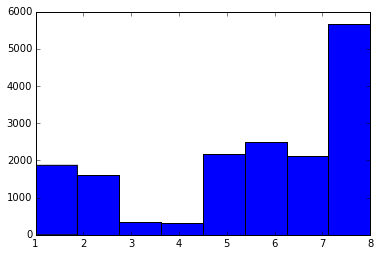

In [17]:
#Histograms for different 
resp = np.array(train[train["CodeNumber1"]==1]['Response'])
plt.hist(resp, bins=np.linspace(1,8,9))

#No significant difference in shape for different shapes. There is certainly an impact


(array([  53.,    0.,   13.,   28.,   42.,  126.,  138.,  375.]),
 array([ 1.   ,  1.875,  2.75 ,  3.625,  4.5  ,  5.375,  6.25 ,  7.125,  8.   ]),
 <a list of 8 Patch objects>)

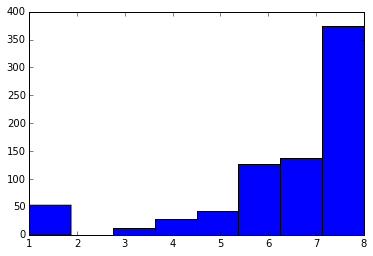

In [22]:
#Histograms for different 
resp = np.array(train[train["CodeNumber2"]==5]['Response'])
plt.hist(resp, bins=np.linspace(1,8,9))

#Shape is mostly consistent. It is only off for group 5

In [37]:
#Lets Explore the data
#We want to predict Response Field.
#Response is an ordinal variable so the analysis may need to be a classification problem
train.fillna(0,inplace=True)
train.describe()

#Apply same manipulation to test
test.fillna(0,inplace=True)

C:\Users\Thayer Adsit\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


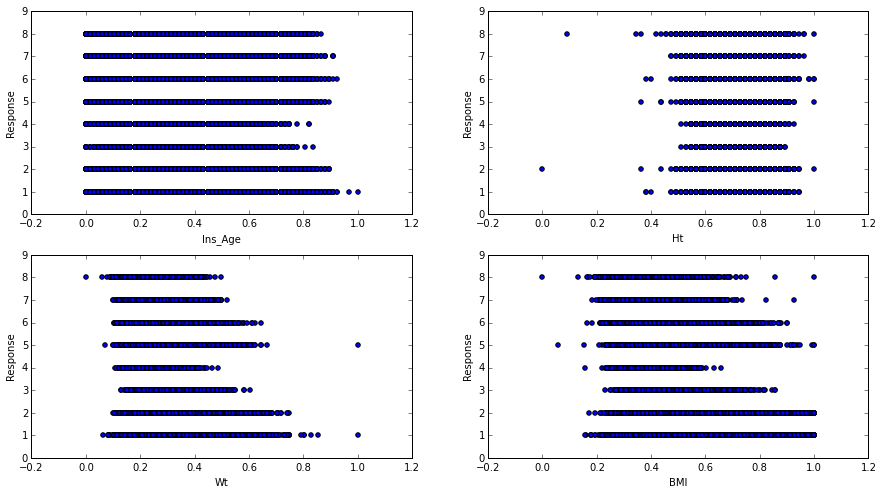

In [38]:
#Plots on Plots on Plots

plt.figure()
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
train.plot(x='Ins_Age',y='Response',kind='scatter',ax=axes[0,0])
train.plot(x='Ht',y='Response',kind='scatter',ax=axes[0,1])
train.plot(x='Wt',y='Response',kind='scatter',ax=axes[1,0])
train.plot(x='BMI',y='Response',kind='scatter',ax=axes[1,1])

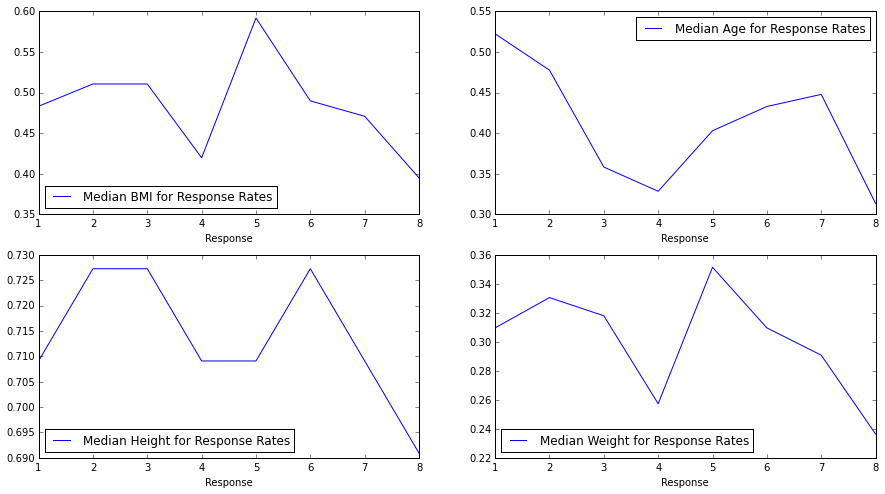

In [39]:
#Too much variance in data
#Lets get some medians

#let's look at it for each season
grouped = train.groupby(by="Response")
a = grouped.median()[['BMI','Ht','Wt','Ins_Age','CodeNumber1','CodeNumber2']].reset_index()

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,8))
a.plot(x='Response', y='BMI', ax=axes[0,0],label='Median BMI for Response Rates')
a.plot(x='Response', y='Ins_Age', ax=axes[0,1],label='Median Age for Response Rates')
a.plot(x='Response', y='Ht', ax=axes[1,0],label='Median Height for Response Rates')
a.plot(x='Response', y='Wt', ax=axes[1,1],label='Median Weight for Response Rates')


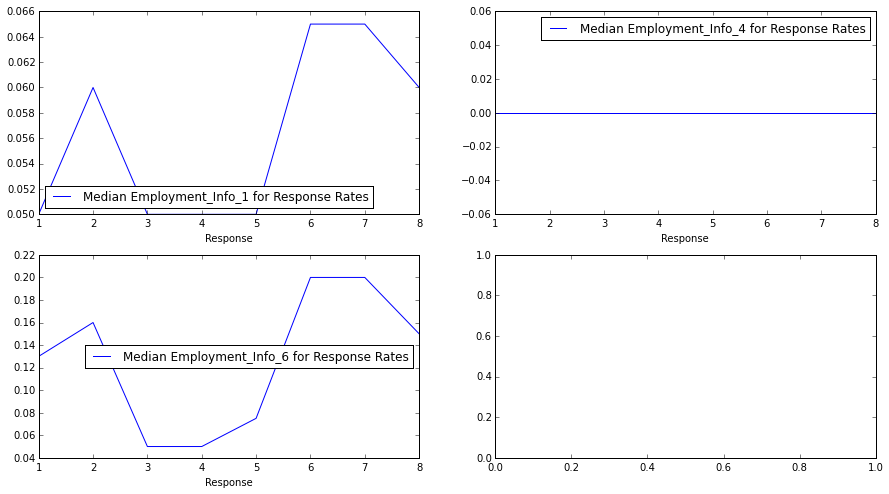

In [40]:
#It is difficult to understand the impacts. The results are nonlinear
#Lets explore some more about employment history

grouped = train.groupby(by="Response")
a = grouped.median()[['Employment_Info_1','Employment_Info_2','Employment_Info_3','Employment_Info_4','Employment_Info_5','Employment_Info_6']].reset_index()

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,8))
a.plot(x='Response', y='Employment_Info_1', ax=axes[0,0],label='Median Employment_Info_1 for Response Rates')
a.plot(x='Response', y='Employment_Info_4', ax=axes[0,1],label='Median Employment_Info_4 for Response Rates')
a.plot(x='Response', y='Employment_Info_6', ax=axes[1,0],label='Median Employment_Info_6 for Response Rates')


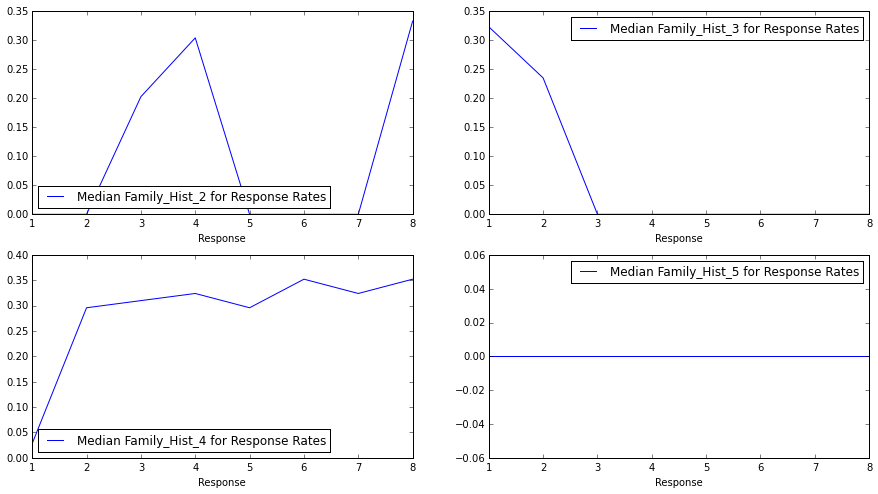

In [41]:
#Many of the above are fields where the vast majority are dominated by a single value
#Evaluate InsuredInfo
#It is difficult to understand the impacts. The results are nonlinear
#Lets explore some more about employment history


grouped = train.groupby(by="Response")
a = grouped.median()[['Family_Hist_1','Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5']].reset_index()

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,8))
a.plot(x='Response', y='Family_Hist_2', ax=axes[0,0],label='Median Family_Hist_2 for Response Rates')
a.plot(x='Response', y='Family_Hist_3', ax=axes[0,1],label='Median Family_Hist_3 for Response Rates')
a.plot(x='Response', y='Family_Hist_4', ax=axes[1,0],label='Median Family_Hist_4 for Response Rates')
a.plot(x='Response', y='Family_Hist_5', ax=axes[1,1],label='Median Family_Hist_5 for Response Rates')




In [58]:
#There is some correlation. Response 4 indicates a minimum value for the majority of indicators, familiy history, BMI, Height, WT, Age

#Create Initial Random 
#Create Initial Random Forest to Identify Initial Results
#Drop ID number as it should not have impact

predictors=train.columns[:]

In [59]:
predictors.drop(["Id","Response"],1)

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48', 'KeywordTotal', 'CodeNumber1', 'CodeNumber2'],
      dtype='object', length=128)

In [60]:
predictors

Index(['Id', 'Product_Info_1', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response', 'KeywordTotal', 'CodeNumber1', 'CodeNumber2'],
      dtype='object', length=130)

In [61]:
alg=RandomForestClassifier(random_state=1,n_estimators=200)
alg.fit(train[predictors.drop(["Id","Response"],1)],train["Response"])

test["Id"]
test["Response"]=alg.predict(test[predictors.drop(["Id","Response"],1)])
submission=pd.DataFrame({
        "Id": test["Id"],
        "Response": test["Response"]
    })

scores=cross_validation.cross_val_score(alg,train[predictors.drop(["Id","Response"],1)],train["Response"])



In [62]:
print(scores.mean())
submission.to_csv("kaggle.csv",index=False)

0.553173309158


Index(['Product_Info_3', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       'Employment_Info_1', 'Employment_Info_3', 'Employment_Info_5',
       'InsuredInfo_2', 'InsuredInfo_5', 'Insurance_History_4',
       'Insurance_History_7', 'Insurance_History_9', 'Family_Hist_1',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_3', 'Medical_History_14',
       'Medical_History_22', 'Medical_History_40', 'Medical_Keyword_2',
       'Medical_Keyword_14', 'Medical_Keyword_48', 'Response', 'KeywordTotal'],
      dtype='object')
[  44.73463832   43.62012149   34.80727939   69.24361852  100.
   39.78711504   18.17854087   10.16393732   31.97372911   23.55564915
   10.62016025   24.0454115     9.44763254   10.1915872    25.41025294
   24.25532171   31.18130116   18.72171743   32.39102659   33.55012367
   28.9094989    22.049069     17.5924143     8.81120848    8.8472106
   15.37790274   20.56437527   11.34373169   23.89200474]

C:\Users\Thayer Adsit\Anaconda3\lib\site-packages\pandas\core\index.py:1154: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 130 but corresponding boolean dimension is 128
  result = getitem(key)


TypeError: Can't convert 'float' object to str implicitly

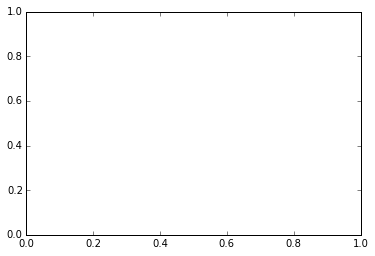

In [66]:
# Plot feature importance
feature_importance = alg.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

important_names = predictors[feature_importance > np.mean(feature_importance)]
important_features=feature_importance[feature_importance>np.mean(feature_importance)]
print(important_names)
print(important_features)


In [54]:
#Evaluate success with more limited number of features. This has a much lower accuracy
predictors=important_names
alg=RandomForestClassifier(random_state=1,n_estimators=200)
alg.fit(train[predictors.drop(["Response"],1)],train["Response"])

test["Response"]=alg.predict(test[predictors.drop(["Response"],1)])
submission=pd.DataFrame({
        "Id": test["Id"],
        "Response": test["Response"]
    })

scores=cross_validation.cross_val_score(alg,train[predictors.drop(["Response"],1)],train["Response"])
print(scores.mean())

0.447331517526
